In [305]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [2]:
import cv2
import imghdr

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [559]:
from sklearn.model_selection import train_test_split

train_images = []       
train_labels = []
x=[]
scaled=[]
shape = (227,227)  
train_path = 'data4/sample_0'

x=load_images_from_folder('data4/t_0')
for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    train_images.append(img)
for i in range(len(x)):
    train_labels.append(0)

x=load_images_from_folder('data4/t_1')

for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    train_images.append(img)
# print(len(train_images))
for i in range(len(x)):
    train_labels.append(1) 

x=load_images_from_folder('data4/t_2')    
for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    train_images.append(img)
for i in range(len(x)):
    train_labels.append(2) 

x=load_images_from_folder('data4/t_3')    
for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    train_images.append(img)
print(len(train_images))
for i in range(len(x)):
    train_labels.append(3) 

# scaled=np.array(train_images)
# scaled=scaled.map(lambda x:(x/255))
# print(len(k))
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=42,train_size=0.8,stratify=train_labels)

119


In [560]:
test_images = []       
test_labels = []
x=[]
scaled=[]
shape = (227,227)  
test_path = 'data4/test_0'

x=load_images_from_folder('data4/new_test_0')
for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    test_images.append(img)
for i in range(len(x)):
    test_labels.append(0)

x=load_images_from_folder('data4/new_test_1')

for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    test_images.append(img)
# print(len(train_images))
for i in range(len(x)):
    test_labels.append(1) 

x=load_images_from_folder('data4/new_test_2')    
for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    test_images.append(img)
for i in range(len(x)):
    test_labels.append(2) 

x=load_images_from_folder('data4/new_test_3')    
for i in x:
    img = cv2.resize(i,shape)
    img=img[:]/255
    test_images.append(img)
print(len(train_images))
for i in range(len(x)):
    test_labels.append(3) 

# scaled=np.array(train_images)
# scaled=scaled.map(lambda x:(x/255))
# print(len(k))
# Converting labels into One Hot encoded sparse matrix
test_labels = pd.get_dummies(test_labels).values

# Converting train_images to array
test_images = np.array(test_images)

119


In [172]:
import tensorflow as tf
# x_train = tf.convert_to_tensor(x in train_images)
# type(x_train)
x_train.shape
print(test_images.min())
len(y_train)

0.0


150

In [364]:
gpus= tf.config.experimental.list_physical_devices("GPU")
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [538]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(4,4), filters=4, activation='tanh', input_shape=(227,227,3,)))
model.add(Conv2D(filters=8,kernel_size = (4,4),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64,kernel_size = (2,2),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=128,kernel_size = (2,2),activation='tanh'))
model.add(MaxPool2D(2,2))
# model.add(Conv2D(filters=30,kernel_size = (2,2),activation='tanh'))
# model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(128,activation='relu', kernel_regularizer='l1'))
model.add(Dense(64,activation='relu', kernel_regularizer='l1'))
model.add(Dense(32,activation='relu', kernel_regularizer='l1'))
# model.add(Dense(,activation='relu', kernel_regularizer='l1'))
model.add(Dense(3,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam',
              
             )

In [561]:
# Use this model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(227,227,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu', kernel_regularizer='l1'))
model.add(Dense(15,activation='relu', kernel_regularizer='l1'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['AUC','acc','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'],
              optimizer='adam'
             )

In [524]:
# model = Sequential([
#     Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
#     BatchNormalization(),
#     MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#     BatchNormalization(),
#     MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     BatchNormalization(),
#     Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     BatchNormalization(),
#     Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     BatchNormalization(),
#     MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     Flatten(),
#     Dense(4096, activation='relu'),
#     Dropout(0.5),
#     Dense(4096, activation='relu'),
#     Dropout(0.5),
#     Dense(3, activation='softmax')
# ])
# model.compile(
#               loss='categorical_crossentropy', 
#               metrics=['acc'],
#               optimizer='adam'
#              )

In [532]:
model.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_346 (Conv2D)         (None, 225, 225, 32)      896       
                                                                 
 conv2d_347 (Conv2D)         (None, 223, 223, 30)      8670      
                                                                 
 max_pooling2d_218 (MaxPooli  (None, 74, 74, 30)       0         
 ng2D)                                                           
                                                                 
 conv2d_348 (Conv2D)         (None, 72, 72, 30)        8130      
                                                                 
 max_pooling2d_219 (MaxPooli  (None, 36, 36, 30)       0         
 ng2D)                                                           
                                                                 
 conv2d_349 (Conv2D)         (None, 34, 34, 30)      

In [533]:
logdir='logs'

In [534]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [563]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_val,y_val),callbacks=[tensorboard_callback])

Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 1.2497 - auc: 0.9918 - acc: 0.9474 - precision: 0.9570 - recall: 0.9368 - true_positives: 89.0000 - true_negatives: 281.0000 - false_positives: 4.0000 - false_negatives: 6.0000 - val_loss: 1.3727 - val_auc: 0.9688 - val_acc: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_true_positives: 21.0000 - val_true_negatives: 69.0000 - val_false_positives: 3.0000 - val_false_negatives: 3.0000
Epoch 2/50
3/3 [==============================] - 6s 2s/step - loss: 1.2728 - auc: 0.9899 - acc: 0.9053 - precision: 0.9043 - recall: 0.8947 - true_positives: 85.0000 - true_negatives: 276.0000 - false_positives: 9.0000 - false_negatives: 10.0000 - val_loss: 1.3243 - val_auc: 0.9771 - val_acc: 0.7500 - val_precision: 0.7826 - val_recall: 0.7500 - val_true_positives: 18.0000 - val_true_negatives: 67.0000 - val_false_positives: 5.0000 - val_false_negatives: 6.0000
Epoch 3/50
3/3 [==============================] - 6s 2s/step - loss

Epoch 19/50
3/3 [==============================] - 6s 2s/step - loss: 0.9724 - auc: 0.9983 - acc: 0.9895 - precision: 0.9895 - recall: 0.9895 - true_positives: 94.0000 - true_negatives: 284.0000 - false_positives: 1.0000 - false_negatives: 1.0000 - val_loss: 1.1346 - val_auc: 0.9734 - val_acc: 0.9167 - val_precision: 0.9167 - val_recall: 0.9167 - val_true_positives: 22.0000 - val_true_negatives: 70.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000
Epoch 20/50
3/3 [==============================] - 6s 2s/step - loss: 0.9782 - auc: 0.9950 - acc: 0.9789 - precision: 0.9789 - recall: 0.9789 - true_positives: 93.0000 - true_negatives: 283.0000 - false_positives: 2.0000 - false_negatives: 2.0000 - val_loss: 1.0730 - val_auc: 0.9931 - val_acc: 0.9167 - val_precision: 0.9167 - val_recall: 0.9167 - val_true_positives: 22.0000 - val_true_negatives: 70.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000
Epoch 21/50
3/3 [==============================] - 6s 2s/step - lo

Epoch 37/50
3/3 [==============================] - 6s 2s/step - loss: 0.8452 - auc: 0.9987 - acc: 0.9895 - precision: 0.9895 - recall: 0.9895 - true_positives: 94.0000 - true_negatives: 284.0000 - false_positives: 1.0000 - false_negatives: 1.0000 - val_loss: 1.0206 - val_auc: 0.9725 - val_acc: 0.9167 - val_precision: 0.9167 - val_recall: 0.9167 - val_true_positives: 22.0000 - val_true_negatives: 70.0000 - val_false_positives: 2.0000 - val_false_negatives: 2.0000
Epoch 38/50
3/3 [==============================] - 6s 2s/step - loss: 0.8287 - auc: 0.9994 - acc: 0.9895 - precision: 0.9895 - recall: 0.9895 - true_positives: 94.0000 - true_negatives: 284.0000 - false_positives: 1.0000 - false_negatives: 1.0000 - val_loss: 0.9612 - val_auc: 0.9881 - val_acc: 0.9583 - val_precision: 0.9583 - val_recall: 0.9583 - val_true_positives: 23.0000 - val_true_negatives: 71.0000 - val_false_positives: 1.0000 - val_false_negatives: 1.0000
Epoch 39/50
3/3 [==============================] - 6s 2s/step - lo

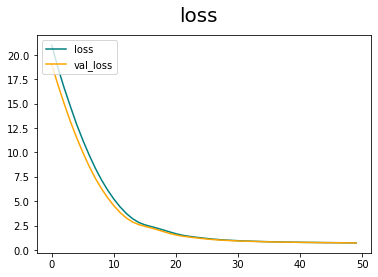

In [552]:
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

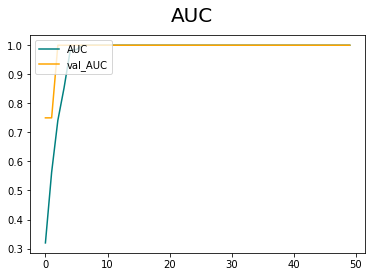

In [553]:
fig=plt.figure()
plt.plot(history.history['auc'],color='teal',label='AUC')
plt.plot(history.history['val_auc'],color='orange',label='val_AUC')
fig.suptitle('AUC',fontsize=20)
plt.legend(loc='upper left')
plt.show()

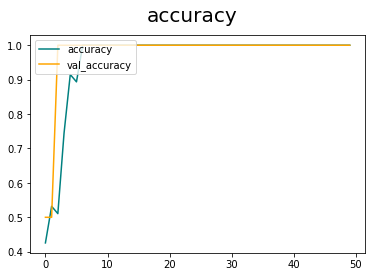

In [554]:
fig=plt.figure()
plt.plot(history.history['acc'],color='teal',label='accuracy')
plt.plot(history.history['val_acc'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

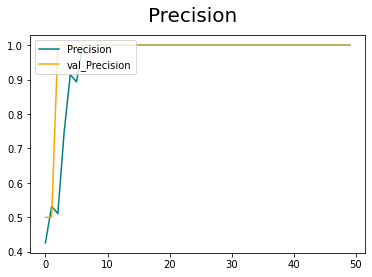

In [555]:
fig=plt.figure()
plt.plot(history.history['precision'],color='teal',label='Precision')
plt.plot(history.history['val_precision'],color='orange',label='val_Precision')
fig.suptitle('Precision',fontsize=20)
plt.legend(loc='upper left')
plt.show()

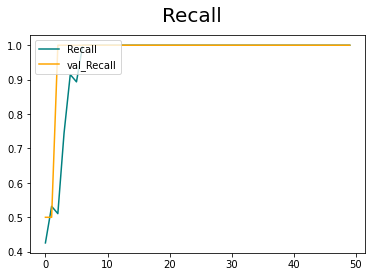

In [556]:
fig=plt.figure()
plt.plot(history.history['recall'],color='teal',label='Recall')
plt.plot(history.history['val_recall'],color='orange',label='val_Recall')
fig.suptitle('Recall',fontsize=20)
plt.legend(loc='upper left')
plt.show()

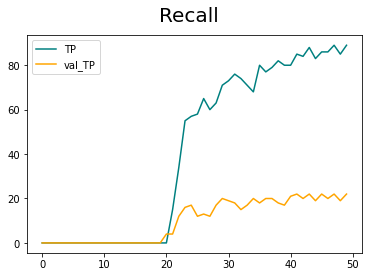

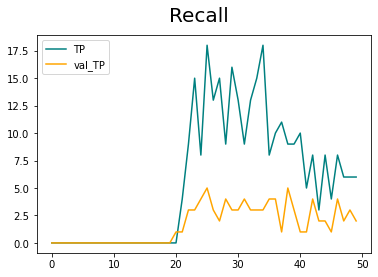

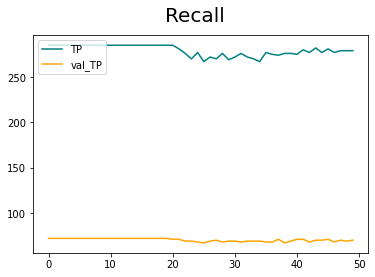

In [557]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

1/1 [==============================] - 0s 129ms/step - loss: 0.7242 - auc: 1.0000 - acc: 1.0000 - precision: 1.0000 - recall: 1.0000 - true_positives: 12.0000 - true_negatives: 12.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00
[0.7242110371589661, 1.0, 1.0, 1.0, 1.0, 12.0, 12.0, 0.0, 0.0]


In [ ]:
cov = tfp.stats.covariance(, y, sample_axis=0, event_axis=None)

[0 0 0 1]


56

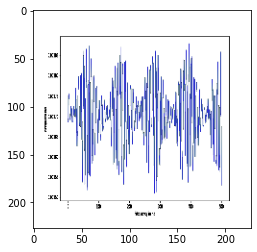

In [448]:
# Visualizing Training data
print(test_labels[46])
plt.imshow(test_images[46])
len(test_labels)


In [449]:
# Testing predictions and the actual label
checkImage = test_images[45:46]
checklabel = test_labels[45:46]

predict = model.predict(checkImage)

# output = { 0:'without vibration',1:'type 1 vibration',2:'type 2 vibration',3:'type 3 vibration'}
output = { 0:'without vibration',1:'type 1 vibration',2:'type 2 vibration'}
print("Actual :- ",checklabel)
print("Predicted :- ",(predict))

1/1 [==============================] - 0s 28ms/step
Actual :-  [[0 0 0 1]]
Predicted :-  [[0.01570155 0.01213553 0.13665594 0.835507  ]]


In [558]:
evaluate = model.evaluate(test_images,test_labels)
print(evaluate)

1/1 [==============================] - 0s 261ms/step - loss: 0.7242 - auc: 1.0000 - acc: 1.0000 - precision: 1.0000 - recall: 1.0000 - true_positives: 28.0000 - true_negatives: 28.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00
[0.7242196202278137, 1.0, 1.0, 1.0, 1.0, 28.0, 28.0, 0.0, 0.0]


In [564]:
model.save(os.path.join('models','train_detection_3.h5'))